# Data Cleaning Pipeline
1. Graph numerical values
2. Graph counts of categorical labels
3. Graph missing values (optional)
4. Graph relationships between numerical values
5. Graph relationships between features and target variable

In [44]:
# Install package if you don't have them already
# !pip3 install openpyxl -q
# !pip3 install matplotlib -q 
!pip3 install nbconvert

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [15]:
import pandas as pd

View data

In [16]:
df = pd.read_excel("logistics-data.xlsx")
df.head()

GpsProvider           BookingID Market/Regular           BookingID_Date  \
0  CONSENT TRACK  MVCV0000927/082021          Market 2020-08-17 14:59:01.000   
1        VAMOSYS  VCV00014271/082021         Regular 2020-08-27 16:22:22.827   
2  CONSENT TRACK  VCV00014382/082021         Regular 2020-08-27 17:59:24.987   
3        VAMOSYS  VCV00014743/082021         Regular 2020-08-28 00:48:24.503   
4        VAMOSYS  VCV00014744/082021         Regular 2020-08-28 01:23:19.243   

   vehicle_no                                    Origin_Location  \
0    KA590408               TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU   
1  TN30BC5917  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...   
2  TN22AR2748              LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY   
3  TN28AQ0781  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...   
4   TN68F1722              LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY   

                                Destination_Location      Org_lat_lon  \
0       ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA  13.1550,80.1960   
1  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...  12.8390,79.9540   
2              LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY  11.8710,79.7390   
3  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...  12.8390,79.9540   
4              LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY  11.8720,79.6320   

       Des_lat_lon      Data_Ping_time  ... TRANSPORTATION_DISTANCE_IN_KM  \
0  12.7400,77.8200 2020-08-24 00:05:09  ...                         320.0   
1  12.8390,79.9540 2020-08-28 12:40:28  ...                         103.0   
2  11.8710,79.7390 2020-08-28 09:05:09  ...                         300.0   
3  12.8390,79.9540 2020-08-28 12:40:31  ...                          61.0   
4  11.8720,79.6320 2020-08-28 12:40:29  ...                         240.0   

  vehicleType Minimum_kms_to_be_covered_in_a_day Driver_Name  Driver_MobileNo  \
0         NaN                                NaN         NaN              NaN   
1         NaN                                NaN      RAMESH              NaN   
2         NaN                                NaN        GIRI              NaN   
3         NaN                                NaN        RAVI              NaN   
4         NaN                                NaN       TAMIL              NaN   

   customerID                          customerNameCode  supplierID  \
0  ALLEXCHE45                     Ashok leyland limited  VIJEXHOSR7   
1  DMREXCHEUX  Daimler india commercial vehicles pvt lt  VJLEXSHE09   
2  LUTGCCHE06                             Lucas tvs ltd  GSTEXLAK1Q   
3  DMREXCHEUX  Daimler india commercial vehicles pvt lt  ARVEXNAM09   
4  LUTGCCHE06                             Lucas tvs ltd  SRTEXKOR96   

    supplierNameCode          Material Shipped  
0    VIJAY TRANSPORT     BRACKET / GRAB HANDLE  
1       VJ LOGISTICS     ZB MODEL PLATE / 3143  
2     G.S. TRANSPORT          LETTERING / FUSO  
3  ARVINTH TRANSPORT  LU STRUT RA / RADIUS ROD  
4      SR TRANSPORTS      WISHBONE / V ROD/HDT  

[5 rows x 32 columns]

1. Graph numerical values
Think Histograms and boxplots:
- Curr_lat: Has a multi-modal distribution so many of the delivery locations vary in latitude.  
- Curr_lon: Possibly a uni-modal distribution (if smoothed) so delivery locations are usually on a particular longitude.
- TRANSPORTATION_DISTANCE_IN_KM: Packages are most often delivered over a smaller distance (less than 500 km) with fewer extreme values (over 2000 km).
- Minimum_kms_to_be_covered_in_a_day: Average distance covered is around 250 km.
- Driver_MobileNo: numerical value but unnecessary to analyze.

In [17]:
# Not interested in Driver_MobileNo
print(df.select_dtypes('number').columns)
NUMERIC_COLUMNS = ['Curr_lat', 'Curr_lon', 'TRANSPORTATION_DISTANCE_IN_KM',
       'Minimum_kms_to_be_covered_in_a_day']

Index(['Curr_lat', 'Curr_lon', 'TRANSPORTATION_DISTANCE_IN_KM',
       'Minimum_kms_to_be_covered_in_a_day', 'Driver_MobileNo'],
      dtype='object')


Curr_lat                                 AxesSubplot(0.125,0.125;0.168478x0.755)
Curr_lon                              AxesSubplot(0.327174,0.125;0.168478x0.755)
TRANSPORTATION_DISTANCE_IN_KM         AxesSubplot(0.529348,0.125;0.168478x0.755)
Minimum_kms_to_be_covered_in_a_day    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

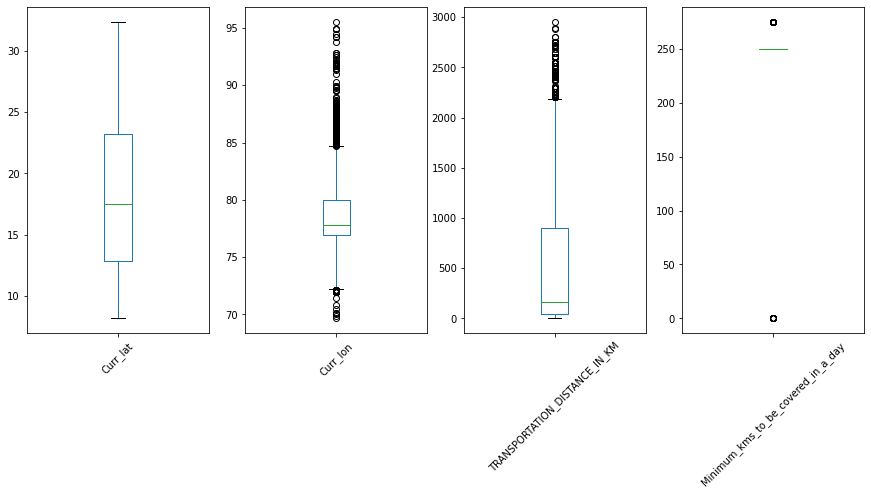

In [18]:
# df[NUMERIC_COLUMNS].plot(kind='hist', figsize=(20,20), subplots=True, sharex=False)
# df[NUMERIC_COLUMNS].plot(kind='kde', figsize=(20,20), subplots=True, sharex=False)
df[NUMERIC_COLUMNS].plot(kind='box', figsize=(15,6), rot =45, subplots=True,layout=(1,4))

2. Graph counts of categorical labels
- Look for variables with fewer number of unique variables. 

An unique ID is important to identify data points but is not that interesting to analyze individually.

In [19]:
print(df.select_dtypes(exclude=['number']).columns)
print(df.apply(lambda col: col.nunique()))

FEWER_UNIQUE_CATEGORICAL_COLUMNS = ['GpsProvider','Market/Regular ']
for ind, col in enumerate(FEWER_UNIQUE_CATEGORICAL_COLUMNS):
    ax = plt.subplot(1, 2, ind+1)
    plt.title(col)
    df.loc[:,col].value_counts().plot(kind="bar", ax =ax, figsize = (15,4), rot=90)

Index(['GpsProvider', 'BookingID', 'Market/Regular ', 'BookingID_Date',
       'vehicle_no', 'Origin_Location', 'Destination_Location', 'Org_lat_lon',
       'Des_lat_lon', 'Data_Ping_time', 'Planned_ETA', 'Current_Location',
       'DestinationLocation', 'actual_eta', 'ontime', 'delay',
       'OriginLocation_Code', 'DestinationLocation_Code', 'trip_start_date',
       'trip_end_date', 'vehicleType', 'Driver_Name', 'customerID',
       'customerNameCode', 'supplierID', 'supplierNameCode',
       'Material Shipped'],
      dtype='object')
GpsProvider                             29
BookingID                             6875
Market/Regular                           2
BookingID_Date                        6005
vehicle_no                            2325
Origin_Location                        180
Destination_Location                   520
Org_lat_lon                            173
Des_lat_lon                            522
Data_Ping_time                        3756
Planned_ETA              

NameError: name 'plt' is not defined

What about the rest when we have ?

View the top 10 most frequent labels.

In [ ]:
 df.loc[:, 'BookingID'].value_counts().head(10)

In [ ]:
CATEGORICAL_COLUMNS = df.select_dtypes(exclude=['number'])
plt.tight_layout()
for ind, col in enumerate(CATEGORICAL_COLUMNS):
    ax = plt.subplot(8, 4, ind+1)
    plt.subplots_adjust(hspace=2)
    df.loc[:,col].value_counts().head(10).plot(kind="bar", ax =ax, figsize = (15,20), rot=90)

In [ ]:
# !pip3 install missingno -q
import missingno as mn


- GpsProvider, Data_Ping_team, Current_Location, Curr_lat, Curr_lon: have similar missing values.
- When a value is missing in 'ontime', the corresponding value in 'delay' is present.
- 'Minimum_kms_to_be_covered_in_a_day' has many missing values

In [ ]:
df.columns

In [ ]:
mn.matrix(df)

Graph relationships between numerical values

<AxesSubplot:>

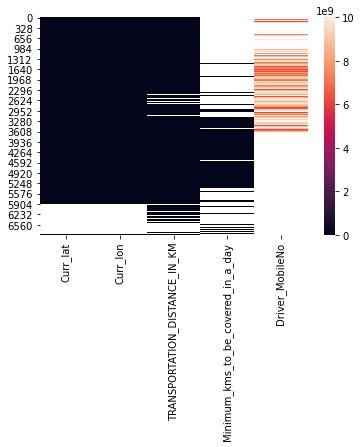

In [43]:
import seaborn as sns
# sns.pairplot(df)
sns.heatmap(df.select_dtypes('number'))

In [38]:
df['y'] = df['ontime'].map({'G':'ontime'}).fillna('delay')
# df['y'] = df['y'].fillna('delay')
df['y']

0        delay
1       ontime
2       ontime
3       ontime
4       ontime
         ...  
6875    ontime
6876    ontime
6877    ontime
6878     delay
6879    ontime
Name: y, Length: 6880, dtype: object

<AxesSubplot:xlabel='Minimum_kms_to_be_covered_in_a_day', ylabel='TRANSPORTATION_DISTANCE_IN_KM'>

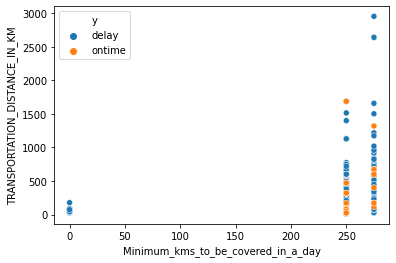

In [39]:
# sns.pairplot(df,  hue= 'y_ontime')
df.columns
sns.scatterplot(data=df, x='Minimum_kms_to_be_covered_in_a_day', y='TRANSPORTATION_DISTANCE_IN_KM', hue='y')